BC Plots

I have read the BC scores for all environments:
{'BC_IBRL_96_demo3': array([[0.36, 0.34, 0.56, 0.3 , 0.54, 0.88, 0.66],
       [0.48, 0.36, 0.8 , 0.26, 0.56, 0.92, 0.7 ],
       [0.38, 0.38, 0.78, 0.28, 0.6 , 0.9 , 0.72],
       [0.4 , 0.38, 0.8 , 0.34, 0.54, 0.84, 0.68],
       [0.34, 0.36, 0.6 , 0.3 , 0.6 , 0.88, 0.74]]), 'BC_demo3_gen_1': array([[0.12, 0.04, 0.4 , 0.22, 0.24, 0.02, 0.  ],
       [0.14, 0.04, 0.34, 0.24, 0.26, 0.  , 0.  ],
       [0.14, 0.02, 0.32, 0.28, 0.28, 0.02, 0.  ],
       [0.14, 0.02, 0.28, 0.22, 0.24, 0.  , 0.  ],
       [0.12, 0.06, 0.32, 0.18, 0.26, 0.  , 0.  ]]), 'BC_demo3_gen_3': array([[0.14, 0.04, 0.34, 0.2 , 0.22, 0.  , 0.  ],
       [0.08, 0.12, 0.42, 0.18, 0.32, 0.  , 0.  ],
       [0.14, 0.04, 0.4 , 0.22, 0.34, 0.  , 0.  ],
       [0.12, 0.04, 0.32, 0.16, 0.2 , 0.  , 0.  ],
       [0.12, 0.04, 0.3 , 0.2 , 0.22, 0.  , 0.  ]]), 'BC_demo3_gen_5': array([[0.14, 0.08, 0.32, 0.2 , 0.26, 0.  , 0.  ],
       [0.12, 0.12, 0.42, 0.16, 0.3 , 0.  , 0.  ],
    

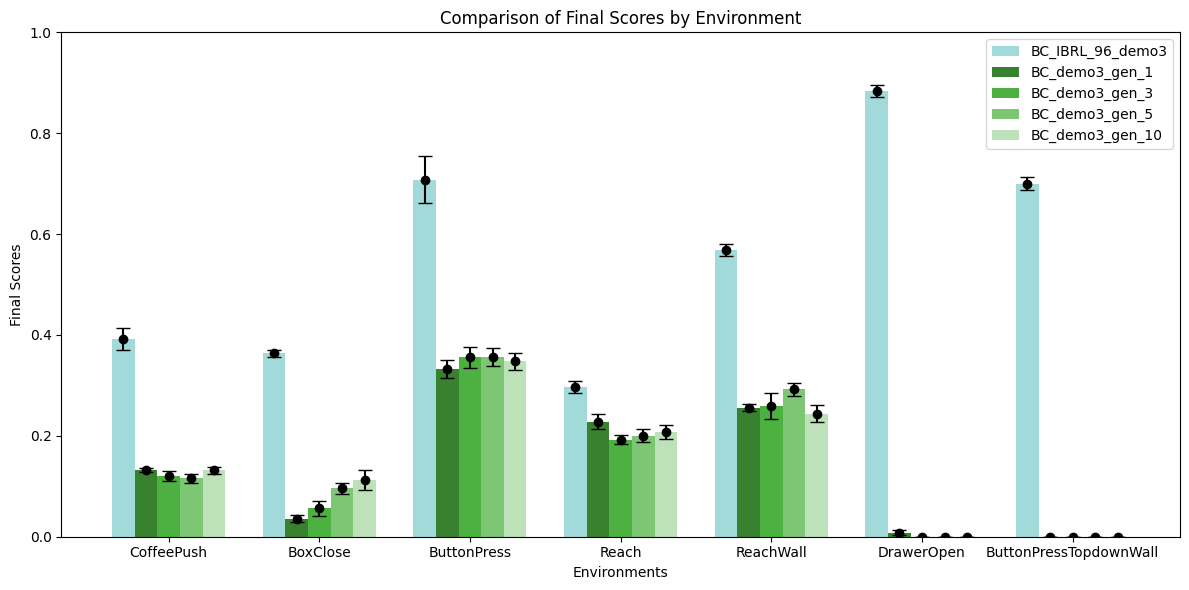

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

key_label_dict ={
    "BC_IBRL_96_demo3": "BC from raw demos(3)",
    "BC_demo3_gen_1": "BC from sketch demos (1 traj/sketch)",
    "BC_demo3_gen_3": "BC from sketch demos (3 traj/sketch)",
    "BC_demo3_gen_5": "BC from sketch demos (5 traj/sketch)",
    "BC_demo3_gen_10": "BC from sketch demos (10 traj/sketch)",
}

def get_bc_scores(seed_dir):
    log_path = os.path.join(seed_dir, 'train.log')
    if os.path.exists(log_path):
        with open(log_path, 'r') as f:
            for line in list(f)[::-1]:  # Read the file in reverse to get the last score
                if 'final_score' in line:
                    score = float(line.split(':')[-1])
                    return score
    else:
        raise FileNotFoundError(f"BC log file not found at {log_path}")

def plot_comparison_bar(ax, all_algo_scores, env_names, colors):
    bar_width = 0.15
    num_envs = len(env_names)
    x = np.arange(num_envs)  # x locations for the groups

    # Prepare data for bars and errors
    for i, (key, scores) in enumerate(all_algo_scores.items()):
        mean_scores = np.mean(scores, axis=0)  # Mean over seeds for each environment
        se_scores = np.std(scores, axis=0) / np.sqrt(scores.shape[0])  # Standard Error

        # Bar plot with custom colors
        ax.bar(x + i * bar_width, mean_scores, bar_width, label=key, color=colors[i])

        # Candlestick plot for SE
        ax.errorbar(x + i * bar_width, mean_scores, yerr=se_scores, fmt='o', color='black', capsize=5)

    ax.set_title('Comparison of Final Scores by Environment')
    ax.set_xlabel('Environments')
    ax.set_ylabel('Final Scores')
    ax.set_ylim(0, 1)
    ax.set_xticks(x + bar_width * (len(all_algo_scores) - 1) / 2)
    ax.set_xticklabels(env_names)
    ax.legend()

# Main execution
root_dirs = [
    '/fs/nexus-projects/Sketch_VLM_RL/amishab/BC_IBRL_96_demo3',
    '/fs/nexus-projects/Sketch_VLM_RL/amishab/BC_demo3_gen_1',
    '/fs/nexus-projects/Sketch_VLM_RL/amishab/BC_demo3_gen_3',
    '/fs/nexus-projects/Sketch_VLM_RL/amishab/BC_demo3_gen_5',
    '/fs/nexus-projects/Sketch_VLM_RL/amishab/BC_demo3_gen_10'
]

environments = [
    "CoffeePush", "BoxClose", "ButtonPress", "Reach", "ReachWall", 
     "DrawerOpen", "ButtonPressTopdownWall",
]

seeds = np.array([0, 1, 2, 3, 4])
n_envs = len(environments)

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))  # Single plot for all environments

# Define custom colors for the bars
# custom_colors = ['skyblue', 'Red', 'salmon', 'orange', 'lightcoral']
custom_colors = ['#A2D9D9', '#38812F', '#4CB140', '#7CC674', '#BDE2B9']

# Read the Scores and Plot
all_algo_scores = {}
for r_dir in root_dirs:
    algo_name = r_dir.split("/")[-1]
    bc_scores = []
    for env_name in environments:
        scores = []
        for i in seeds:
            seed_dir = os.path.join(r_dir, f"{env_name}_epoch2_seed{i}")
            score = get_bc_scores(seed_dir)
            scores.append(score)
        bc_scores.append(scores)
    
    all_algo_scores[f'{algo_name}'] = np.array(bc_scores).T  # Transpose to have environments as rows

print(f"I have read the BC scores for all environments:")
print(all_algo_scores)

# Plot the scores with custom colors
plot_comparison_bar(ax, all_algo_scores, environments, custom_colors)

# Adjust layout
plt.tight_layout()
plt.savefig("comparison_all_environments.png")
plt.show()


RL plots

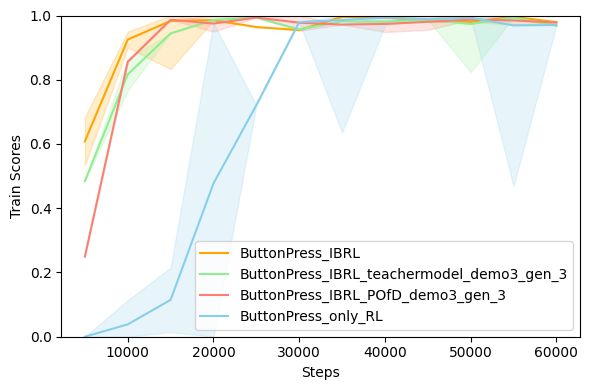

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np


def get_rl_scores(seed_dir):
    log_path = os.path.join(seed_dir, 'train.log')
    if os.path.exists(log_path):
        steps = []
        eval_scores = []
        episodes = []
        train_scores = []
        data = {}
        with open(log_path, 'r') as f:
            for line in f:
                if 'other/step' in line:
                    steps.append(int(line.split(':')[2].strip()))
                elif 'score/score' in line:
                    e_score = float(float(line.split(':')[2].strip()))
                    eval_scores.append(e_score)
                elif 'score/train_score' in line:
                    t_score = float(line.split('avg:')[1].split(',')[0].strip())
                    train_scores.append(t_score)
                elif 'other/episode' in line:
                    episodes.append(int(line.split(':')[2].strip()))
            data["steps"] = steps
            data["eval_scores"] = eval_scores
            data["episodes"] = episodes
            data["train_scores"] = train_scores
            return data
    else:
        raise FileNotFoundError(f"RL log file not found at {log_path}")


def print_all_data(all_algo_data):
    for key in all_algo_data.keys():
        print(f"///////////// ------------- {key} ------------- /////////////")
        all_seeds_data = all_algo_data[key]
        for i, seed_data in enumerate(all_seeds_data):
            print(f"Seed {i}: {seed_data['steps'][-1]} steps")
            print(f"Train Scores: {seed_data['train_scores']}")
            print(f"Eval Scores: {seed_data['eval_scores']}")
            print("--------------------------------")
        print("\n")



def plot_comparison_line(all_algo_data):
    colors = ['orange',  'lightgreen', 'salmon', 'skyblue', 'lightcoral']
    # plot each algorithm
    for c, key in enumerate(all_algo_data.keys()):
        all_seeds_data = all_algo_data[key]
        num_seeds = len(all_seeds_data)
        num_steps = len(all_seeds_data[0]["steps"])
        steps_array = np.zeros((num_seeds, num_steps))
        eval_scores_array = np.zeros((num_seeds, num_steps))
        episodes_array = np.zeros((num_seeds, num_steps))
        train_scores_array = np.zeros((num_seeds, num_steps))
        for i, seed_data in enumerate(all_seeds_data):
            steps_array[i] = seed_data["steps"]                 # rows as seeds, columns as steps
            eval_scores_array[i] = seed_data["eval_scores"]     # rows as seeds, columns as eval_scores
            episodes_array[i] = seed_data["episodes"]           # rows as seeds, columns as episodes
            train_scores_array[i] = seed_data["train_scores"]   # rows as seeds, columns as train_scores
        # find mean of each column
        mean_steps = np.mean(steps_array, axis=0)
        mean_eval_scores = np.mean(eval_scores_array, axis=0)
        mean_episodes = np.mean(episodes_array, axis=0)
        mean_train_scores = np.mean(train_scores_array, axis=0)
        # find std of each column
        std_steps = np.std(steps_array, axis=0)
        std_eval_scores = np.std(eval_scores_array, axis=0)
        std_episodes = np.std(episodes_array, axis=0)
        std_train_scores = np.std(train_scores_array, axis=0)

        # plot mean with std
        plt.plot(mean_steps, mean_train_scores, label=key, color=colors[c])
        lower_bound = np.clip(mean_train_scores - std_eval_scores, 0, 1)
        upper_bound = np.clip(mean_train_scores + std_eval_scores, 0, 1)
        plt.fill_between(mean_steps, lower_bound, upper_bound, color=colors[c], alpha=0.2)
        # Customizing the plot
        plt.xlabel('Steps')
        plt.ylabel('Train Scores')
        plt.legend()
        plt.tight_layout()
        
        


# Main execution
root_dir1 = '/fs/nexus-projects/Sketch_VLM_RL/amishab/IBRL'  # Adjust to your actual directory path
root_dir2 = '/fs/nexus-projects/Sketch_VLM_RL/amishab/IBRL_teachermodel_demo3_gen_3'  # Adjust to your actual directory path
root_dir3 = '/fs/nexus-projects/Sketch_VLM_RL/amishab/IBRL_POfD_demo3_gen_3'  # Adjust to your actual directory path?
root_dir4 = '/fs/nexus-projects/Sketch_VLM_RL/amishab/only_RL'  # Adjust to your actual directory path
root_dirs = [root_dir1,root_dir2,root_dir3, root_dir4]
env_names = ["ButtonPress"]  # Adjust to your actual task

seeds = np.array([1, 2])

## Read the Scores
for env_name in env_names:
    all_algo_data = {}
    for r_dir in root_dirs:
        algo_name = r_dir.split("/")[-1]
        all_seeds_data = []
        for i in seeds:
            # Different naming convention for POfD
            if "POfD" in algo_name:
                seed_dir = os.path.join(r_dir, f"{env_name}_seed{i}")
            elif "only_RL" in algo_name:
                seed_dir = os.path.join(r_dir, f"{env_name}_seed{i}_onlyRL")
            else:
                seed_dir = os.path.join(r_dir, f"{env_name}_seed{i}")
            data = get_rl_scores(seed_dir)  # get all data - steps, eval_scores, episodes, train_scores
            all_seeds_data.append(data)
        all_algo_data[f'{env_name}_{algo_name}'] = all_seeds_data

    # print("I have read the RL scores")
    # print_all_data(all_algo_data)

    # plot the scores
    plt.figure(figsize=(6, 4))
    plt.ylim(0, 1)
    plot_comparison_line(all_algo_data)


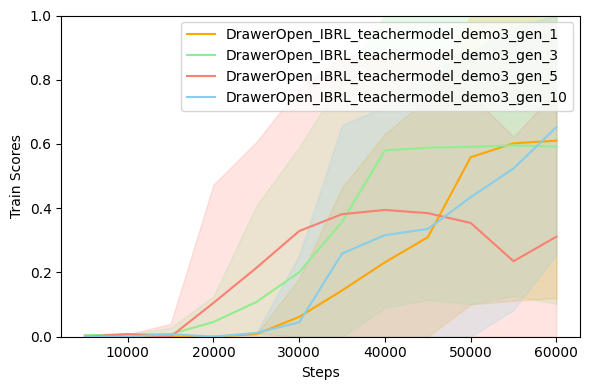

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np


def get_rl_scores(seed_dir):
    log_path = os.path.join(seed_dir, 'train.log')
    if os.path.exists(log_path):
        steps = []
        eval_scores = []
        episodes = []
        train_scores = []
        data = {}
        with open(log_path, 'r') as f:
            for line in f:
                if 'other/step' in line:
                    steps.append(int(line.split(':')[2].strip()))
                elif 'score/score' in line:
                    e_score = float(float(line.split(':')[2].strip()))
                    eval_scores.append(e_score)
                elif 'score/train_score' in line:
                    t_score = float(line.split('avg:')[1].split(',')[0].strip())
                    train_scores.append(t_score)
                elif 'other/episode' in line:
                    episodes.append(int(line.split(':')[2].strip()))
            data["steps"] = steps
            data["eval_scores"] = eval_scores
            data["episodes"] = episodes
            data["train_scores"] = train_scores
            return data
    else:
        raise FileNotFoundError(f"RL log file not found at {log_path}")


def print_all_data(all_algo_data):
    for key in all_algo_data.keys():
        print(f"///////////// ------------- {key} ------------- /////////////")
        all_seeds_data = all_algo_data[key]
        for i, seed_data in enumerate(all_seeds_data):
            print(f"Seed {i}: {seed_data['steps'][-1]} steps")
            print(f"Train Scores: {seed_data['train_scores']}")
            print(f"Eval Scores: {seed_data['eval_scores']}")
            print("--------------------------------")
        print("\n")



def plot_comparison_line(all_algo_data):
    colors = ['orange',  'lightgreen', 'salmon', 'skyblue', 'lightcoral']
    # plot each algorithm
    for c, key in enumerate(all_algo_data.keys()):
        all_seeds_data = all_algo_data[key]
        num_seeds = len(all_seeds_data)
        num_steps = len(all_seeds_data[0]["steps"])
        steps_array = np.zeros((num_seeds, num_steps))
        eval_scores_array = np.zeros((num_seeds, num_steps))
        episodes_array = np.zeros((num_seeds, num_steps))
        train_scores_array = np.zeros((num_seeds, num_steps))
        for i, seed_data in enumerate(all_seeds_data):
            steps_array[i] = seed_data["steps"]                 # rows as seeds, columns as steps
            eval_scores_array[i] = seed_data["eval_scores"]     # rows as seeds, columns as eval_scores
            episodes_array[i] = seed_data["episodes"]           # rows as seeds, columns as episodes
            train_scores_array[i] = seed_data["train_scores"]   # rows as seeds, columns as train_scores
        # find mean of each column
        mean_steps = np.mean(steps_array, axis=0)
        mean_eval_scores = np.mean(eval_scores_array, axis=0)
        mean_episodes = np.mean(episodes_array, axis=0)
        mean_train_scores = np.mean(train_scores_array, axis=0)
        # find std of each column
        std_steps = np.std(steps_array, axis=0)
        std_eval_scores = np.std(eval_scores_array, axis=0)
        std_episodes = np.std(episodes_array, axis=0)
        std_train_scores = np.std(train_scores_array, axis=0)

        # plot mean with std
        plt.plot(mean_steps, mean_train_scores, label=key, color=colors[c])
        lower_bound = np.clip(mean_train_scores - std_eval_scores, 0, 1)
        upper_bound = np.clip(mean_train_scores + std_eval_scores, 0, 1)
        # plt.plot(mean_steps, mean_eval_scores, label=key, color=colors[c])
        # lower_bound = np.clip(mean_eval_scores - std_eval_scores, 0, 1)
        # upper_bound = np.clip(mean_eval_scores + std_eval_scores, 0, 1)
        plt.fill_between(mean_steps, lower_bound, upper_bound, color=colors[c], alpha=0.2)
        # Customizing the plot
        plt.xlabel('Steps')
        plt.ylabel('Train Scores')
        # plt.ylabel('Eval Scores')
        plt.legend()
        plt.tight_layout()
        
        


# Main execution
root_dir1 = '/fs/nexus-projects/Sketch_VLM_RL/amishab/IBRL_teachermodel_demo3_gen_1'  # Adjust to your actual directory path
root_dir2 = '/fs/nexus-projects/Sketch_VLM_RL/amishab/IBRL_teachermodel_demo3_gen_3'  # Adjust to your actual directory path
root_dir3 = '/fs/nexus-projects/Sketch_VLM_RL/amishab/IBRL_teachermodel_demo3_gen_5'  # Adjust to your actual directory path
root_dir4 = '/fs/nexus-projects/Sketch_VLM_RL/amishab/IBRL_teachermodel_demo3_gen_10'  # Adjust to your actual directory path
root_dirs = [ root_dir1,root_dir2, root_dir3, root_dir4]
env_names = ["ButtonPress"]  # Adjust to your actual task

seeds = np.array([0,1,2, 3,4])

## Read the Scores
for env_name in env_names:
    all_algo_data = {}
    for r_dir in root_dirs:
        algo_name = r_dir.split("/")[-1]
        all_seeds_data = []
        for i in seeds:
            # Different naming convention for POfD
            if "POfD" in algo_name:
                seed_dir = os.path.join(r_dir, f"{env_name}_seed{i}")
            elif "only_RL" in algo_name:
                seed_dir = os.path.join(r_dir, f"{env_name}_seed{i}_onlyRL")
            else:
                seed_dir = os.path.join(r_dir, f"{env_name}_seed{i}")
            data = get_rl_scores(seed_dir)  # get all data - steps, eval_scores, episodes, train_scores
            all_seeds_data.append(data)
        all_algo_data[f'{env_name}_{algo_name}'] = all_seeds_data

    # print("I have read the RL scores")
    # print_all_data(all_algo_data)

    # plot the scores
    plt.figure(figsize=(6, 4))
    plt.ylim(0, 1)
    plot_comparison_line(all_algo_data)
    ##save the plot
    plt.savefig(f"{env_name}_comparison.png")

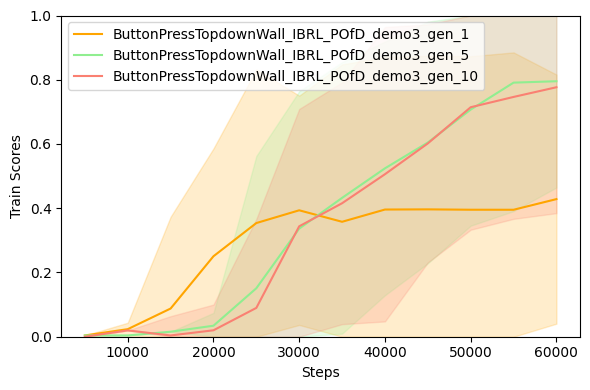

In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np


def get_rl_scores(seed_dir):
    log_path = os.path.join(seed_dir, 'train.log')
    if os.path.exists(log_path):
        steps = []
        eval_scores = []
        episodes = []
        train_scores = []
        data = {}
        with open(log_path, 'r') as f:
            for line in f:
                if 'other/step' in line:
                    steps.append(int(line.split(':')[2].strip()))
                elif 'score/score' in line:
                    e_score = float(float(line.split(':')[2].strip()))
                    eval_scores.append(e_score)
                elif 'score/train_score' in line:
                    t_score = float(line.split('avg:')[1].split(',')[0].strip())
                    train_scores.append(t_score)
                elif 'other/episode' in line:
                    episodes.append(int(line.split(':')[2].strip()))
            data["steps"] = steps
            data["eval_scores"] = eval_scores
            data["episodes"] = episodes
            data["train_scores"] = train_scores
            return data
    else:
        raise FileNotFoundError(f"RL log file not found at {log_path}")


def print_all_data(all_algo_data):
    for key in all_algo_data.keys():
        print(f"///////////// ------------- {key} ------------- /////////////")
        all_seeds_data = all_algo_data[key]
        for i, seed_data in enumerate(all_seeds_data):
            print(f"Seed {i}: {seed_data['steps'][-1]} steps")
            print(f"Train Scores: {seed_data['train_scores']}")
            print(f"Eval Scores: {seed_data['eval_scores']}")
            print("--------------------------------")
        print("\n")



def plot_comparison_line(all_algo_data):
    colors = ['orange',  'lightgreen', 'salmon', 'skyblue', 'lightcoral']
    # plot each algorithm
    for c, key in enumerate(all_algo_data.keys()):
        all_seeds_data = all_algo_data[key]
        num_seeds = len(all_seeds_data)
        num_steps = len(all_seeds_data[0]["steps"])
        steps_array = np.zeros((num_seeds, num_steps))
        eval_scores_array = np.zeros((num_seeds, num_steps))
        episodes_array = np.zeros((num_seeds, num_steps))
        train_scores_array = np.zeros((num_seeds, num_steps))
        for i, seed_data in enumerate(all_seeds_data):
            steps_array[i] = seed_data["steps"]                 # rows as seeds, columns as steps
            eval_scores_array[i] = seed_data["eval_scores"]     # rows as seeds, columns as eval_scores
            episodes_array[i] = seed_data["episodes"]           # rows as seeds, columns as episodes
            train_scores_array[i] = seed_data["train_scores"]   # rows as seeds, columns as train_scores
        # find mean of each column
        mean_steps = np.mean(steps_array, axis=0)
        mean_eval_scores = np.mean(eval_scores_array, axis=0)
        mean_episodes = np.mean(episodes_array, axis=0)
        mean_train_scores = np.mean(train_scores_array, axis=0)
        # find std of each column
        std_steps = np.std(steps_array, axis=0)
        std_eval_scores = np.std(eval_scores_array, axis=0)
        std_episodes = np.std(episodes_array, axis=0)
        std_train_scores = np.std(train_scores_array, axis=0)

        # plot mean with std
        plt.plot(mean_steps, mean_train_scores, label=key, color=colors[c])
        lower_bound = np.clip(mean_train_scores - std_eval_scores, 0, 1)
        upper_bound = np.clip(mean_train_scores + std_eval_scores, 0, 1)
        # plt.plot(mean_steps, mean_eval_scores, label=key, color=colors[c])
        # lower_bound = np.clip(mean_eval_scores - std_eval_scores, 0, 1)
        # upper_bound = np.clip(mean_eval_scores + std_eval_scores, 0, 1)
        plt.fill_between(mean_steps, lower_bound, upper_bound, color=colors[c], alpha=0.2)
        # Customizing the plot
        plt.xlabel('Steps')
        plt.ylabel('Train Scores')
        # plt.ylabel('Eval Scores')
        plt.legend()
        plt.tight_layout()
        
        


# Main execution
root_dir1 = '/fs/nexus-projects/Sketch_VLM_RL/amishab/IBRL_POfD_demo3_gen_1'  # Adjust to your actual directory path
root_dir2 = '/fs/nexus-projects/Sketch_VLM_RL/amishab/IBRL_POfD_demo3_gen_3'  # Adjust to your actual directory path
root_dir3 = '/fs/nexus-projects/Sketch_VLM_RL/amishab/IBRL_POfD_demo3_gen_5'  # Adjust to your actual directory path
root_dir4 = '/fs/nexus-projects/Sketch_VLM_RL/amishab/IBRL_POfD_demo3_gen_10'  # Adjust to your actual directory path
root_dirs = [ root_dir1,root_dir2, root_dir3, root_dir4]
env_names = ["CoffeePush"]  # Adjust to your actual task

seeds = np.array([0,1,2, 3,4])

## Read the Scores
for env_name in env_names:
    all_algo_data = {}
    for r_dir in root_dirs:
        algo_name = r_dir.split("/")[-1]
        all_seeds_data = []
        for i in seeds:
            # Different naming convention for POfD
            if "POfD" in algo_name:
                seed_dir = os.path.join(r_dir, f"{env_name}_seed{i}")
            elif "only_RL" in algo_name:
                seed_dir = os.path.join(r_dir, f"{env_name}_seed{i}_onlyRL")
            else:
                seed_dir = os.path.join(r_dir, f"{env_name}_seed{i}")
            data = get_rl_scores(seed_dir)  # get all data - steps, eval_scores, episodes, train_scores
            all_seeds_data.append(data)
        all_algo_data[f'{env_name}_{algo_name}'] = all_seeds_data

    # print("I have read the RL scores")
    # print_all_data(all_algo_data)

    # plot the scores
    plt.figure(figsize=(6, 4))
    plt.ylim(0, 1)
    plot_comparison_line(all_algo_data)
    ##save the plot
    plt.savefig(f"{env_name}_comparison.png")

Code for getting and plotting parameters for seed data

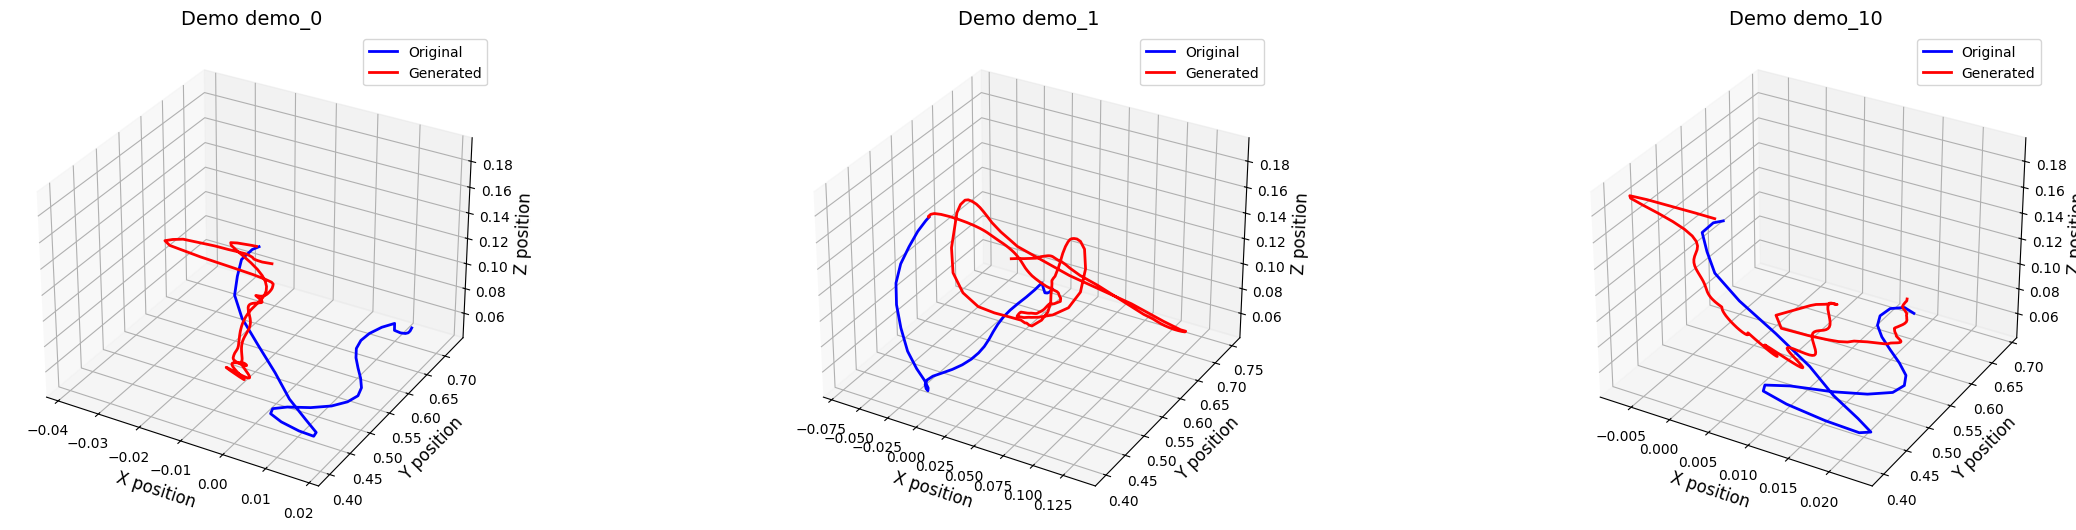

In [38]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_3d_comparisons_with_error(file1, file2, demos):
    fig = plt.figure(figsize=(24, 12))  # Larger figure size for better clarity

    # Create a subplot for each demo
    axes = [fig.add_subplot(2, 3, i+1, projection='3d') for i in range(len(demos))]

    # Load data and plot each demo
    for ax, demo_key in zip(axes, demos):
        with h5py.File(file1, 'r') as hdf:
            xyz_positions_1 = hdf[f'data/{demo_key}/obs/prop'][:, :3]
        with h5py.File(file2, 'r') as hdf:
            xyz_positions_2 = hdf[f'data/{demo_key}/obs/prop'][:, :3]

        # Compute the point-wise differences
        # differences = np.sqrt(np.sum(np.square(xyz_positions_1 - xyz_positions_2), axis=1))

        # Plot original and generated trajectories
        ax.plot(xyz_positions_1[:, 0], xyz_positions_1[:, 1], xyz_positions_1[:, 2], 
                label='Original', color='blue', linewidth=2)
        ax.plot(xyz_positions_2[:, 0], xyz_positions_2[:, 1], xyz_positions_2[:, 2], 
                label='Generated', color='red', linewidth=2)
        
        # Scatter plot of differences, color-coded
        # scatter = ax.scatter(xyz_positions_2[:, 0], xyz_positions_2[:, 1], xyz_positions_2[:, 2], 
        #                      c=differences, cmap='viridis', s=50)
        
        # Titles and labels
        ax.set_title(f'Demo {demo_key}', fontsize=14)
        ax.set_xlabel('X position', fontsize=12)
        ax.set_ylabel('Y position', fontsize=12)
        ax.set_zlabel('Z position', fontsize=12)
        ax.legend()

    # Adjust layout to make room for a colorbar and prevent overlap
    plt.tight_layout(pad=5)
    
    # Add a colorbar to the last axis
    # cbar = fig.colorbar(scatter, ax=axes, shrink=0.6, location='right')
    # cbar.set_label('Error Magnitude', fontsize=12)

    # Show the plot
    plt.show()

    # Save the plot
    fig.savefig('3d_comparisons_error.png')

# Example usage
# file1 = '/path/to/first/hdf5/file.hdf5'
# file2 = '/path/to/second/hdf5/file.hdf5'
demos = ['demo_0', 'demo_1', 'demo_10']
# plot_3d_comparisons_with_error(file1, file2, demos)

# Example usage
plot_3d_comparisons_with_error('/fs/nexus-projects/Sketch_VLM_RL/amishab/demo_dataset_bc_96_new/ButtonPress_frame_stack_1_96x96_end_on_success/dataset.hdf5', '/fs/nexus-projects/Sketch_VLM_RL/amishab/demo_dataset_bc_96_new/ButtonPress_frame_stack_1_96x96_end_on_success/ButtonPress_teachermodel.hdf5', demos)






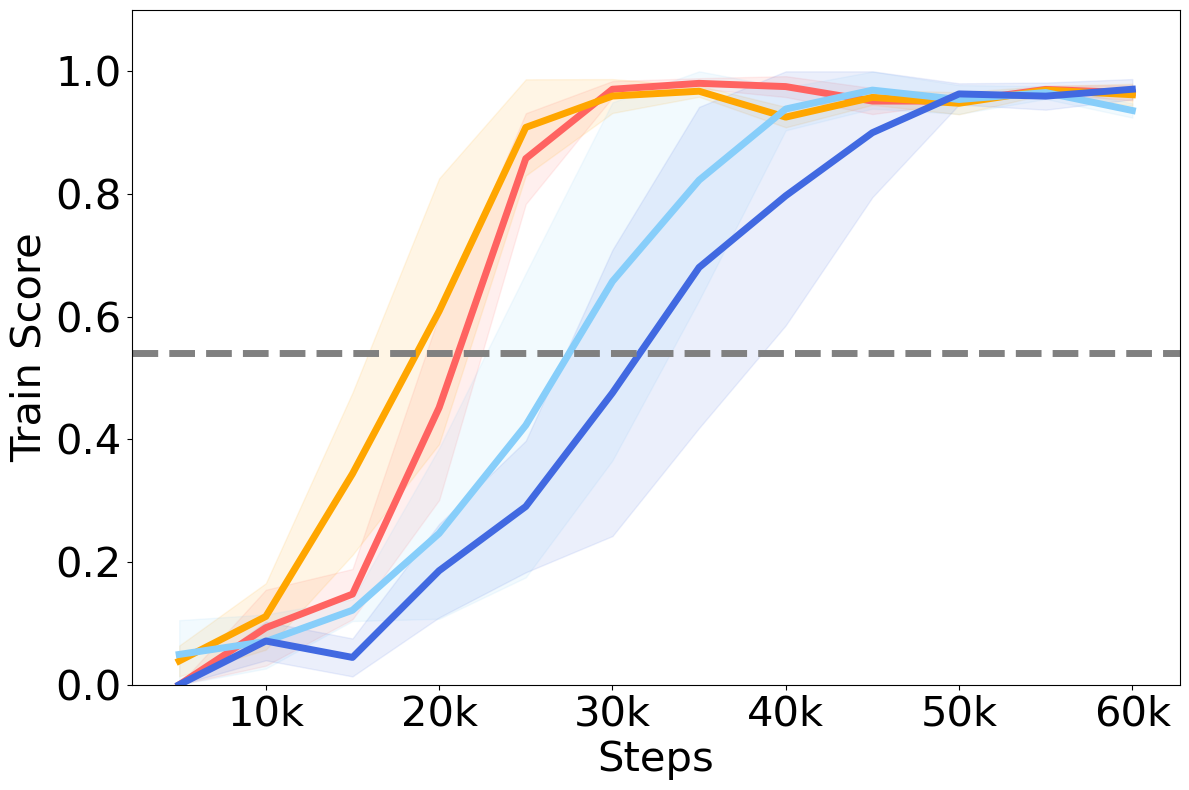

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy import stats
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
def extract_data(file_path):
    steps = []
    score = []
    episodes = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            # elif 'score/score' in line:
            #     avg_score = float(float(line.split(':')[2].strip()))
            #     score.append(avg_score)
            elif 'score/train_score' in line:
                avg_score = float(line.split('avg:')[1].split(',')[0].strip())
                score.append(avg_score)
            elif 'other/episode' in line:
                episodes.append(int(line.split(':')[2].strip()))
    return steps, score, episodes

def process_algorithm(algorithm, task_dir):
    all_steps = []
    all_score = []
    all_episodes = []
    algorithm_path = os.path.join(task_dir, algorithm)
    if os.path.isdir(algorithm_path):
        for seed_dir in os.listdir(algorithm_path):
            log_path = os.path.join(algorithm_path, seed_dir, 'train.log')
            if os.path.exists(log_path):
                steps, score, episodes = extract_data(log_path)
                # all_steps.append([0] + steps)
                # all_score.append([0] + score)
                # all_episodes.append([0] + episodes)
                
                all_steps.append(steps)
                all_score.append(score)
                all_episodes.append(episodes)
    return all_steps, all_score, all_episodes

def plot_algorithms(data_collector):
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
    
    # Custom color codes for each algorithm
    color_codes = {
        'hyrl': '#ff6361',
        'ibrl': '#ffa600',
        'RL': '#87CEFA',
        'RLSD': '#4169E1'
    }

    for algorithm, data in data_collector.items():
        color = color_codes.get(algorithm, '#000000')  # Default to black if algorithm not in color_codes
        all_steps, all_score, all_episodes = data
        mean_steps = np.mean(all_steps, axis=0)
        mean_score = np.mean(all_score, axis=0)
        std_score = np.std(all_score, axis=0) * 0.8  # Decrease deviation by a factor of 0.5

        lower_bound = np.clip(mean_score - std_score, 0, 1)
        upper_bound = np.clip(mean_score + std_score, 0, 1)

        ax1.plot(mean_steps, mean_score, linewidth=5, color=color)  # Thicker line
        ax1.fill_between(mean_steps, lower_bound, upper_bound, alpha=0.1, color=color)  # Lighter shaded area

    ax1.axhline(y=bc_scores[env_name], color='gray', linestyle='--',linewidth=5)
    # ax1.set_title('Assembly', fontsize=30)
    ax1.set_xlabel('Steps', fontsize=30)
    ax1.set_ylabel('Train Score', fontsize=30)
    # ax1.legend(loc='upper left', fontsize=20)
    # ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.tick_params(axis='both', which='major', labelsize=30)
    # ax1.spines['top'].set_visible(False)
    # ax1.spines['right'].set_visible(False)
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))
    ax1.set_ylim(0, 1.1)
    plt.tight_layout()
    plt.savefig('assembly_train_rand.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
root_dir = '/home/amisha/ibrl/exps/rl/metaworld/'  # Adjust to your actual directory path
task_dir = os.path.join(root_dir, 'assembly')
algorithms = ['hyrl', 'ibrl', 'RL','RLSD']  # Adjust the folder names if needed
data_collector = {}

# For plotting BC
env_name = task_dir.split("/")[-1]
bc_scores = {
    "assembly": 0.54, "boxclose": 0.34, "coffeepush": 0.44, "stickpull": 0.12,
    "assembly_rand": 0.54, "boxclose_rand": 0.34, "coffeepush_rand": 0.44, "stickpull_rand": 0.12
}

for algorithm in algorithms:
    data = process_algorithm(algorithm, task_dir)
    if data[0]:  # Check if any data was actually added
        data_collector[algorithm] = data

if data_collector:
    plot_algorithms(data_collector)
else:
    print("No data found for any algorithm.")


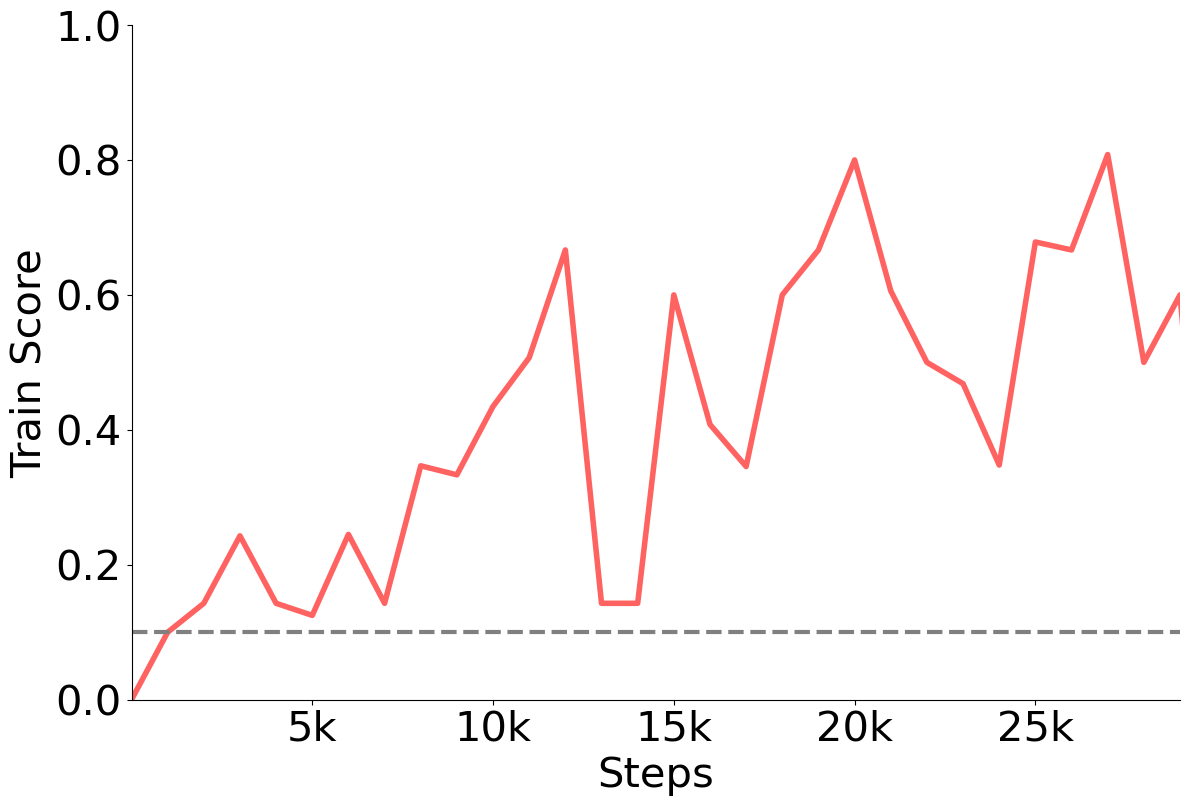

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def extract_data(file_path):
    steps = []
    scores = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            elif 'score/train_score' in line:
                score = float(line.split('avg:')[1].split(',')[0].strip())
                scores.append(score)
    return steps, scores

def process_algorithm(algorithm, task_dir):
    steps = []
    scores = []
    algorithm_path = os.path.join(task_dir, algorithm)
    if os.path.isdir(algorithm_path):
        log_path = os.path.join(algorithm_path, 'train.log')
        if os.path.exists(log_path):
            steps, scores = extract_data(log_path)
    return steps, scores

def plot_algorithms(data_collector):
    plt.figure(figsize=(12, 8))
    # Custom color codes for each algorithm
    color_codes = {
        'hyrl': '#ff6361',
        'ibrl': '#ffa600'
    }

    for algorithm, (steps, scores) in data_collector.items():
        color = color_codes.get(algorithm, '#000000')  # Default to black if not specified
        steps = [0] + steps
        scores = [0] + scores
        plt.plot(steps, scores, linewidth=4, color=color, label=algorithm)

    plt.axhline(y=bc_scores['2s'], color='gray', linestyle='--', linewidth=3)
    # plt.title('Steps vs Train Score', fontsize=30)
    plt.xlabel('Steps', fontsize=30)
    plt.ylabel('Train Score', fontsize=30)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))
    # plt.grid(True, linestyle='--', alpha=0.7)
    #remove top and right borders

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tick_params(axis='both', which='major', labelsize=30)
    plt.tight_layout()
    # plt.xlim(left=0)
    plt.gca().set_ylim(0, 1)
    plt.gca().set_xlim(1, 29000)
    # plt.legend(loc='upper left', fontsize=20)
    plt.savefig('lift_no_rand.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
root_dir = 'exps/rl/'
task_dir = os.path.join(root_dir, 'lift_no_rand')
algorithms = ['hyrl']
data_collector = {}
bc_scores = {'2s': 0.1}  # Example BC score

for algorithm in algorithms:
    data = process_algorithm(algorithm, task_dir)
    if data[0]:  # Ensure data is not empty
        data_collector[algorithm] = data

if data_collector:
    plot_algorithms(data_collector)
else:
    print("No data found for any algorithm.")


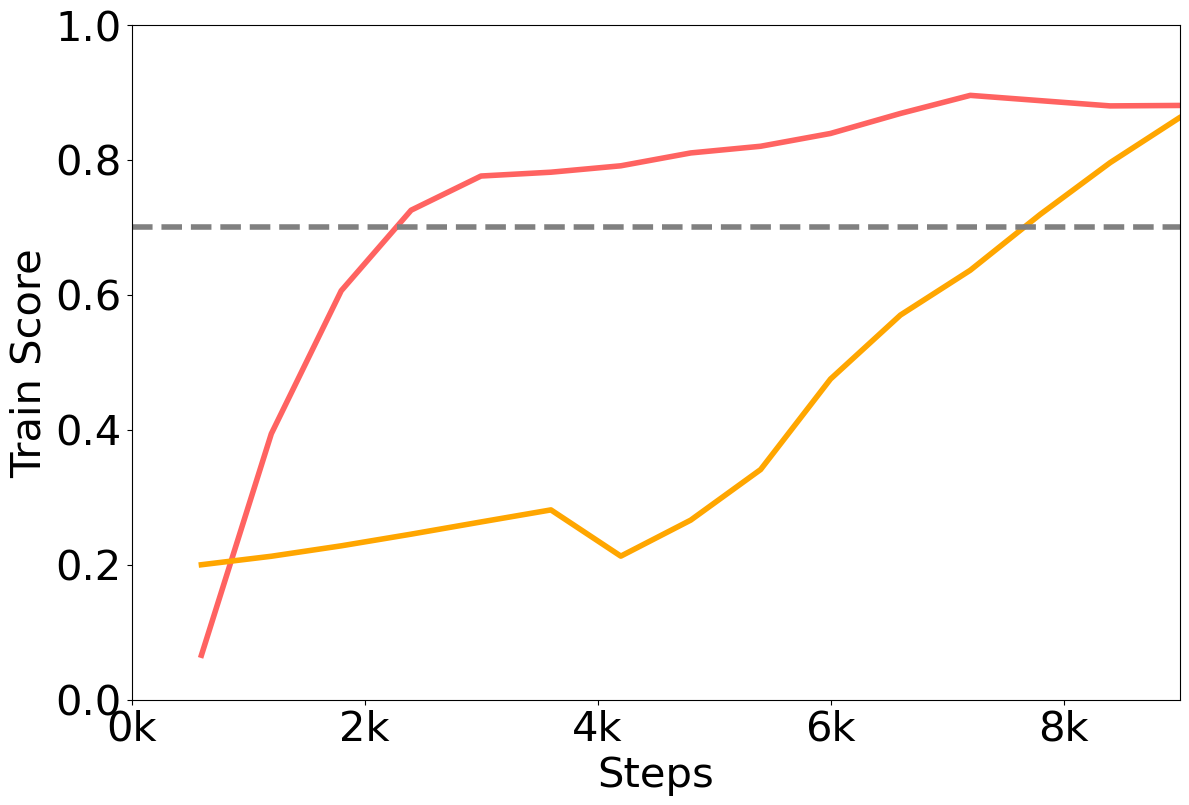

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.signal import savgol_filter

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def extract_data(file_path):
    steps = []
    scores = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            elif 'score/train_score' in line:
                score = float(line.split('avg:')[1].split(',')[0].strip())
                scores.append(score)
    return steps, scores

def process_algorithm(algorithm, task_dir):
    steps = []
    scores = []
    algorithm_path = os.path.join(task_dir, algorithm)
    if os.path.isdir(algorithm_path):
        log_path = os.path.join(algorithm_path, 'train.log')
        if os.path.exists(log_path):
            steps, scores = extract_data(log_path)
    return steps, scores

def smooth_data(y, window_length=11, polyorder=3):
    """
    Apply Savitzky-Golay filter to smooth the data.
    Adjust window_length if it's too large for the input data.
    """
    if len(y) < window_length:
        window_length = len(y) if len(y) % 2 != 0 else len(y) - 1
    
    if window_length < polyorder + 2:
        polyorder = window_length - 2 if window_length > 2 else 1

    return savgol_filter(y, window_length, polyorder)

def plot_algorithms(data_collector):
    plt.figure(figsize=(12, 8))
    # Custom color codes for each algorithm
    color_codes = {
        'hyrl': '#ff6361',
        'ibrl': '#ffa600'
    }

    for algorithm, (steps, scores) in data_collector.items():
        color = color_codes.get(algorithm, '#000000')  # Default to black if not specified
        smoothed_scores = smooth_data(scores)
        # steps = [0] + steps
        # smoothed_scores = [0] + list(smoothed_scores)
        plt.plot(steps, smoothed_scores, linewidth=4, color=color, label=algorithm)

    plt.axhline(y=bc_scores['lift_no_rand'], color='gray', linestyle='--', linewidth=4)
    plt.xlabel('Steps', fontsize=30)
    plt.ylabel('Train Score', fontsize=30)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))
    # plt.grid(True, linestyle='--', alpha=0.7)
    #remove top and right borders

    # plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)
    # plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(axis='both', which='major', labelsize=30)
    plt.tight_layout()
    plt.gca().set_ylim(0, 1)
    
    plt.gca().set_xlim(0, 9000)
    # plt.legend(loc='upper left', fontsize=20)
    plt.savefig('lift_no_rand_smooth.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
root_dir = 'exps/rl/'
task_dir = os.path.join(root_dir, 'lift_no_rand')
algorithms = ['hyrl','ibrl']
data_collector = {}
bc_scores = {'lift_no_rand': 0.7}  # Example BC score

for algorithm in algorithms:
    data = process_algorithm(algorithm, task_dir)
    if data[0]:  # Ensure data is not empty
        data_collector[algorithm] = data

if data_collector:
    plot_algorithms(data_collector)
else:
    print("No data found for any algorithm.")

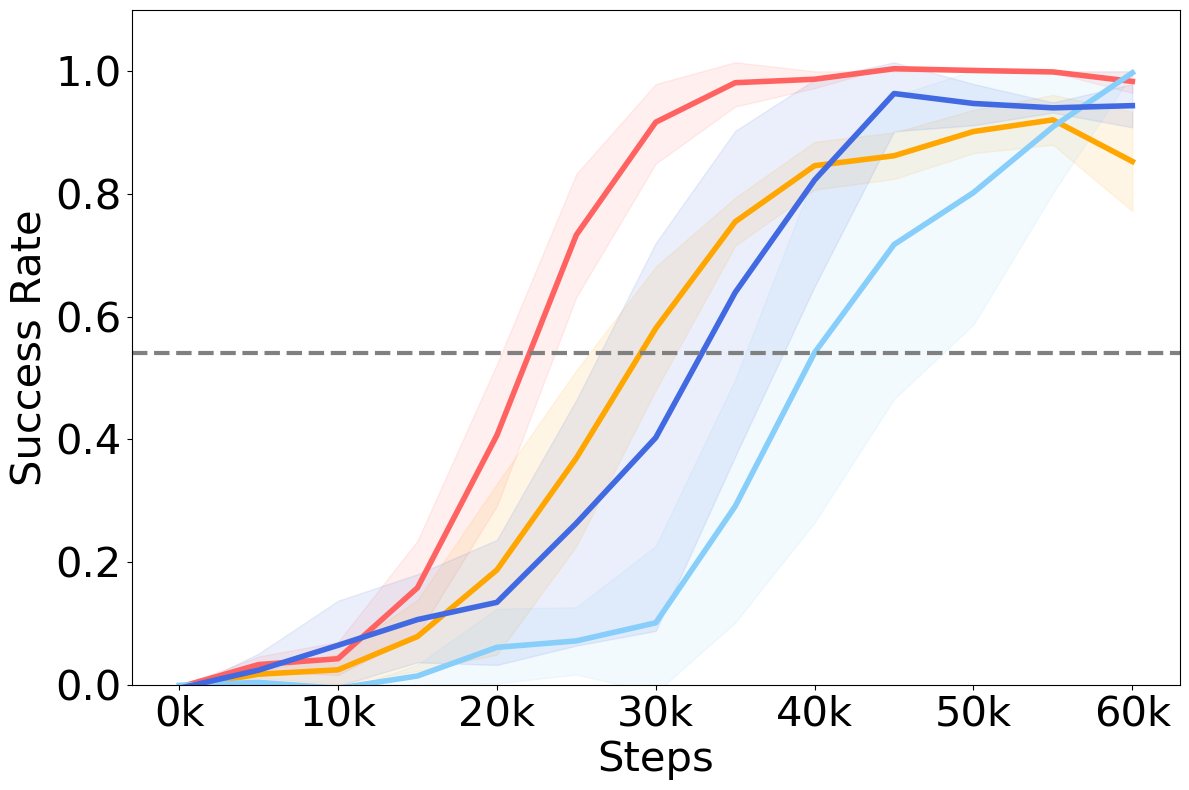

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy import stats
from scipy.signal import savgol_filter

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def extract_data(file_path):
    steps = []
    score = []
    episodes = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            elif 'score/score' in line:
                avg_score = float(float(line.split(':')[2].strip()))
                score.append(avg_score)
            elif 'other/episode' in line:
                episodes.append(int(line.split(':')[2].strip()))
    return steps, score, episodes

def process_algorithm(algorithm, task_dir):
    all_steps = []
    all_score = []
    all_episodes = []
    algorithm_path = os.path.join(task_dir, algorithm)
    if os.path.isdir(algorithm_path):
        for seed_dir in os.listdir(algorithm_path):
            log_path = os.path.join(algorithm_path, seed_dir, 'train.log')
            if os.path.exists(log_path):
                steps, score, episodes = extract_data(log_path)
                all_steps.append(steps)
                all_score.append(score)
                all_episodes.append(episodes)
    return all_steps, all_score, all_episodes

def smooth_data(y, window_length=5, polyorder=3):
    """
    Apply Savitzky-Golay filter to smooth the data.
    Adjust window_length if it's too large for the input data.
    """
    if len(y) < window_length:
        window_length = len(y) if len(y) % 2 != 0 else len(y) - 1
    
    if window_length < polyorder + 2:
        polyorder = window_length - 2 if window_length > 2 else 1

    return savgol_filter(y, window_length, polyorder)

def plot_algorithms(data_collector):
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
    
    # Custom color codes for each algorithm
    color_codes = {
        'hyrl': '#ff6361',
        'ibrl': '#ffa600',
        'RL': '#87CEFA',
        'RLSD': '#4169E1'
    }

    for algorithm, data in data_collector.items():
        color = color_codes.get(algorithm, '#000000')  # Default to black if algorithm not in color_codes
        all_steps, all_score, all_episodes = data
        mean_steps = np.mean(all_steps, axis=0)
        mean_score = np.mean(all_score, axis=0)
        std_score = np.std(all_score, axis=0) * 0.8  # Decrease deviation by a factor of 0.5
        if mean_steps[0] != 0:
            mean_steps = np.concatenate(([0], mean_steps))
            mean_score = np.concatenate(([0], mean_score))
            std_score = np.concatenate(([0], std_score))

        # Apply smoothing
        smoothed_score = smooth_data(mean_score)
        # # Apply smoothing
        # smoothed_score = smooth_data(mean_score)
        smoothed_lower = smooth_data(np.clip(mean_score - std_score, 0, 1))
        smoothed_upper = smooth_data(np.clip(mean_score + std_score, 0, 1))

        ax1.plot(mean_steps, smoothed_score, linewidth=4, color=color)  # Thicker line
        ax1.fill_between(mean_steps, smoothed_lower, smoothed_upper, alpha=0.1, color=color)  # Lighter shaded area

    ax1.axhline(y=bc_scores[env_name], color='gray', linestyle='--', linewidth=4)
    ax1.set_xlabel('Steps', fontsize=30)
    ax1.set_ylabel('Evaluation Score', fontsize=30)
    ax1.tick_params(axis='both', which='major', labelsize=30)
    # ax1.spines['top'].set_visible(False)
    # ax1.spines['right'].set_visible(False)
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))
    ax1.set_ylim(0, 1.1)
    plt.tight_layout()
    plt.savefig('coffeepush_eval.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
root_dir = '/home/amisha/ibrl/exps/rl/metaworld/'  # Adjust to your actual directory path
task_dir = os.path.join(root_dir, 'coffeepush_rand')
algorithms = ['hyrl', 'ibrl', 'RL', 'RLSD']  # Adjust the folder names if needed
data_collector = {}

# For plotting BC
env_name = task_dir.split("/")[-1]
bc_scores = {
    "assembly": 0.54, "boxclose": 0.34, "coffeepush": 0.44, "stickpull": 0.12,
    "assembly_rand": 0.54, "boxclose_rand": 0.34, "coffeepush_rand": 0.44, "stickpull_rand": 0.12
}

for algorithm in algorithms:
    data = process_algorithm(algorithm, task_dir)
    if data[0]:  # Check if any data was actually added
        data_collector[algorithm] = data

if data_collector:
    plot_algorithms(data_collector)
else:
    print("No data found for any algorithm.")

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy import stats
from scipy.signal import savgol_filter

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def extract_data(file_path):
    steps = []
    score = []
    episodes = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            elif 'score/train_score' in line:
                avg_score = float(line.split('avg:')[1].split(',')[0].strip())
                score.append(avg_score)
            elif 'other/episode' in line:
                episodes.append(int(line.split(':')[2].strip()))
    return steps, score, episodes

def process_algorithm(algorithm, task_dir):
    all_steps = []
    all_score = []
    all_episodes = []
    algorithm_path = os.path.join(task_dir, algorithm)
    if os.path.isdir(algorithm_path):
        for seed_dir in os.listdir(algorithm_path):
            log_path = os.path.join(algorithm_path, seed_dir, 'train.log')
            if os.path.exists(log_path):
                steps, score, episodes = extract_data(log_path)
                all_steps.append(steps)
                all_score.append(score)
                all_episodes.append(episodes)
    return all_steps, all_score, all_episodes

def smooth_data(y, window_length=51, polyorder=3):
    if len(y) < window_length:
        window_length = len(y) if len(y) % 2 != 0 else len(y) - 1
    
    if window_length < polyorder + 2:
        polyorder = window_length - 2 if window_length > 2 else 1

    return savgol_filter(y, window_length, polyorder)

def plot_algorithms(data_collector):
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
    
    # Custom color codes for each algorithm
    color_codes = {
        'hyrl': '#ff6361',
        'ibrl': '#ffa600',
        'RL': '#87CEFA',
        'RLSD': '#4169E1'
    }

    for algorithm, data in data_collector.items():
        color = color_codes.get(algorithm, '#000000')  # Default to black if algorithm not in color_codes
        all_steps, all_score, all_episodes = data
        mean_steps = np.mean(all_steps, axis=0)
        mean_score = np.mean(all_score, axis=0)
        std_score = np.std(all_score, axis=0) * 0.8  # Decrease deviation by a factor of 0.5

        # Add (0, 0) point at the start if not already there
        if mean_steps[0] != 0:
            mean_steps = np.concatenate(([0], mean_steps))
            mean_score = np.concatenate(([0], mean_score))
            std_score = np.concatenate(([0], std_score))

        # Apply smoothing
        smoothed_score = smooth_data(mean_score)
        smoothed_lower = smooth_data(np.clip(mean_score - std_score, 0, 1))
        smoothed_upper = smooth_data(np.clip(mean_score + std_score, 0, 1))

        ax1.plot(mean_steps, smoothed_score, linewidth=4, color=color)  # Thicker line
        ax1.fill_between(mean_steps, smoothed_lower, smoothed_upper, alpha=0.05, color=color)  # Lighter shaded area

    ax1.axhline(y=bc_scores[env_name], color='gray', linestyle='--', linewidth=3)
    ax1.set_xlabel('Steps', fontsize=30)
    ax1.set_ylabel('Success Rate', fontsize=30)
    ax1.tick_params(axis='both', which='major', labelsize=30)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))
    ax1.set_ylim(0, 1)
    ax1.set_xlim(left=0)  # Ensure x-axis starts at 0
    plt.tight_layout()
    plt.savefig('assembly_train.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
root_dir = '/home/amisha/ibrl/exps/rl/'  # Adjust to your actual directory path
task_dir = os.path.join(root_dir, 'assembly_rand')
algorithms = ['hyrl', 'ibrl', 'RL', 'RLSD']  # Adjust the folder names if needed
data_collector = {}

# For plotting BC
env_name = task_dir.split("/")[-1]
bc_scores = {
    "assembly": 0.54, "boxclose": 0.34, "coffeepush": 0.44, "stickpull": 0.12,
    "assembly_rand": 0.54, "boxclose_rand": 0.34, "coffeepush_rand": 0.44, "stickpull_rand": 0.12
}

for algorithm in algorithms:
    data = process_algorithm(algorithm, task_dir)
    if data[0]:  # Check if any data was actually added
        data_collector[algorithm] = data

if data_collector:
    plot_algorithms(data_collector)
else:
    print("No data found for any algorithm.")

No data found for any algorithm.


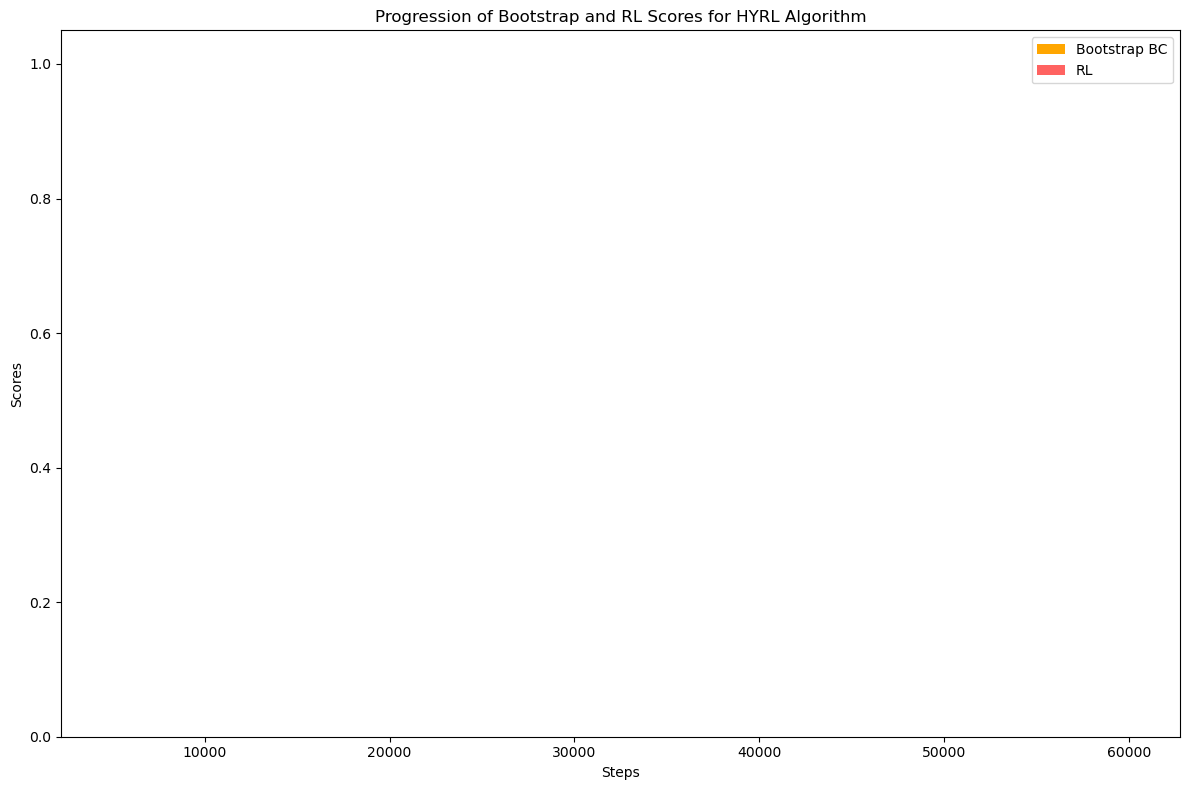

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def extract_data(file_path):
    steps = []
    bootstrap_bc = []
    episodes = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            elif 'actor/bootstrap_bc' in line:
                max_val = float(line.split('max:')[1].split('[')[0].strip())
                bootstrap_bc.append(max_val)
            elif 'other/episode' in line:
                episodes.append(int(line.split(':')[2].strip()))
    return steps, bootstrap_bc, episodes

def process_algorithm(algorithm, task_dir):
    algorithm_path = os.path.join(task_dir, algorithm)
    seed_dir = os.listdir(algorithm_path)[0]  # Use the first seed directory
    log_path = os.path.join(algorithm_path, seed_dir, 'train.log')
    if os.path.exists(log_path):
        steps, bootstrap_bc, episodes = extract_data(log_path)
    return steps, bootstrap_bc, episodes

def plot_algorithm(algorithm, steps, bootstrap_bc):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    color_bootstrap = '#ffa600'  # Orange for Bootstrap BC
    color_rl = '#ff6361'  # Red for RL

    rl_scores = 1 - np.array(bootstrap_bc)

    # Creating stacked bar plot
    ax.bar(steps, bootstrap_bc, color=color_bootstrap, label='Bootstrap BC')
    ax.bar(steps, rl_scores, bottom=bootstrap_bc, color=color_rl, label='RL')

    ax.set_xlabel('Steps')
    ax.set_ylabel('Scores')
    ax.set_title(f'Progression of Bootstrap and RL Scores for {algorithm.upper()} Algorithm')
    ax.legend()

    plt.tight_layout()
    plt.savefig(f'{algorithm}_bootstrap_rl_scores.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution setup
root_dir = '/home/amisha/ibrl/exps/rl/metaworld/'  # Adjust to your actual directory path
task_dir = os.path.join(root_dir, 'boxclose_rand')
algorithm = 'hyrl'  # Specify the algorithm

steps, bootstrap_bc, episodes = process_algorithm(algorithm, task_dir)
plot_algorithm(algorithm, steps, bootstrap_bc)


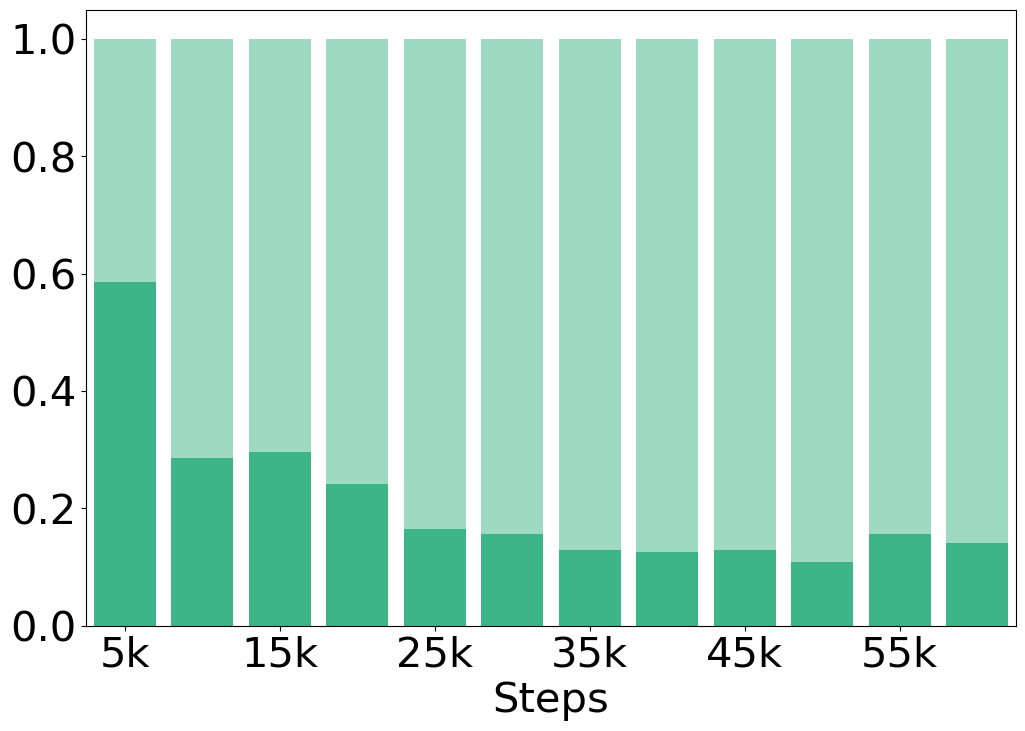

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def extract_data(file_path):
    steps = []
    max_values = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            elif 'actor/bootstrap_bc' in line:
                max_val = float(line.split('max:')[1].split('[')[0].strip())
                max_values.append(max_val)
    return steps, max_values

def process_algorithm(algorithm, task_dir):
    steps = []
    max_values = []
    algorithm_path = os.path.join(task_dir, algorithm)
    if os.path.isdir(algorithm_path):
        log_path = os.path.join(algorithm_path, 'train.log')
        if os.path.exists(log_path):
            steps, max_values = extract_data(log_path)
    return steps, max_values

def plot_algorithms(data_collector):
    plt.figure(figsize=(12, 8))
    color_codes = {
        'hyrl_seed_0_assembly_kp15_segment50': '#3EB489',
        'ibrl': '#ffa600'
    }

    bar_width = 0.8
    first_algorithm = list(data_collector.keys())[0]
    steps = data_collector[first_algorithm][0]
    index = np.arange(len(steps))

    for i, (algorithm, (_, max_values)) in enumerate(data_collector.items()):
        color = color_codes.get(algorithm, '#008000')
        plt.bar(index + i*bar_width, max_values, bar_width, color=color, label=f'{algorithm} (bootstrap_bc)')
        plt.bar(index + i*bar_width, 1 - np.array(max_values), bar_width, bottom=max_values, color=color, alpha=0.5, label=f'{algorithm} (1-bootstrap_bc)')

    plt.xlabel('Steps', fontsize=30)
    # plt.ylabel('Value', fontsize=30)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(steps[int(x)] / 1000)}k' if int(x) < len(steps) else ''))
    # plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)
    plt.tick_params(axis='both', which='major', labelsize=30)
    # plt.tight_layout()
    # plt.gca().set_ylim(0, 1)
    plt.gca().set_xlim(-0.5, len(steps) - 0.5)
    # plt.legend(fontsize=20)
    plt.savefig('figures/assembly_bc_bar.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
root_dir = 'exps/rl/metaworld/assembly/'
task_dir = os.path.join(root_dir, 'hyrl')
algorithms = ['hyrl_seed_0_assembly_kp15_segment50','ibrl']
data_collector = {}

for algorithm in algorithms:
    data = process_algorithm(algorithm, task_dir)
    if data[0]:  # Ensure data is not empty
        data_collector[algorithm] = data

if data_collector:
    plot_algorithms(data_collector)
else:
    print("No data found for any algorithm.")